In [150]:
import pandas as pd
import numpy as np
import os

In [153]:
base_path = './large_dataset/'

In [188]:
os.listdir(base_path)

['bangla_50000-60000_labeled_fixed.csv',
 'bangla_40000-50000_labeled_fixed.csv',
 'bangla_10000-20000_labeled.csv',
 'bangla_100000-120000-labeled.csv',
 'bangla_20000-30000_labeled.csv',
 'bangla_1-10000-labeled-fixed.csv',
 'bangla_60000-80000-labeled.csv',
 'bangla_30000-40000_labeled_fixed.csv']

In [189]:
dfl = []
for fn in os.listdir(base_path):
    dfl.append(pd.read_csv(os.path.join(base_path, fn),
                           names=['sentence_id', 'sentence', 'ignore', 'label']))

In [190]:
# Merging the dataframes                       
df = pd.concat(dfl).dropna()
df.head()

,sentence_id,sentence,ignore,label
0,301610,সময় নষ্ট না করে পেজটি,1.0,-1
1,301611,হে মানবজাতি তোমরা কি এখনও বুঝতে পারছনা আমি চা...,1.0,-1
2,301612,কয়েক জন মানুষের জন্য এত আবেগ।,1.0,2
3,301613,আর মায়ানমারে শত শত মানুষ মেরে ফেলা হচ্ছে তার ক...,1.0,-1
4,301614,শালারা বিমানে উঠার আগে ড্যান্স পার্টি করে মান...,1.0,-1


In [191]:
# pandas drop columns using list of column names
df = df.drop(['ignore'], axis=1)

In [192]:
indexNames = df[(df['label'] == 'ss') |
                (df['label'] == 's') |
                (df['label'] == '.')].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [274]:
df.tail()

,sentence_id,sentence,label
9996,291605,যারা রোহিঙ্গাদের দেশে জায়গা দেওয়ার পক্ষে তাদে...,-1
9997,291606,রোহিঙ্গাদের গণহত্যার বিরুদে পৃথিবীর বিভিন্ন দ...,-1
9998,291607,এই পৃথিবীর সবছেয়ে অমানবিক অশিক্ষিত মুরখ টি দে...,-1
9999,291608,তাদের ভাব দেখে মনে হচ্ছে ভারত এখন আমেরিকা। নি...,-1
10000,291609,ভারতের কেও ভাত পাই কি পায় না সেটা তোকে দেখতে ...,5


In [275]:
df['label'] = df['label'].astype(int)

In [276]:
label_map = {-9: 0,
             -2: 1,
             -1: 2,
             0: 3,
             1: 4,
             2: 5,
             5: 6,
            }

In [277]:
df['label_enc']  = df['label'].map(label_map)

In [278]:
df['label'].value_counts()

-1    45833
 2    20535
 0    18950
 1    12743
-2     1214
 5      701
-9        2
Name: label, dtype: int64

In [279]:
df['label_enc'].value_counts()

2    45833
5    20535
3    18950
4    12743
1     1214
6      701
0        2
Name: label_enc, dtype: int64

In [280]:
docs = df['sentence'].values
y = df['label_enc'].values

In [281]:
docs

array(['সময় নষ্ট না করে পেজটি ',
       ' হে মানবজাতি তোমরা কি এখনও বুঝতে পারছনা আমি চাইলে তোমাদের যে কোন মূহুর্তেই মৃত্যুর সাধ গ্রহন করতে হবে।সুতারং সেদিনের কথা স্বরন কর যেদিন তোমাদের কর্ম ছাড়া আর কিছুই কাজে আসবেনা। ',
       ' কয়েক জন মানুষের জন্য এত আবেগ। ', ...,
       ' এই পৃথিবীর সবছেয়ে অমানবিক অশিক্ষিত মুরখ টি দেশের জনগণ তা হল মায়ানমার এর বৌদ্ধ সম্প্রদায়। ',
       ' তাদের ভাব দেখে মনে হচ্ছে ভারত এখন আমেরিকা। নিজের দেশের লোক ভাত পায়না আবার বড় কথা ',
       ' ভারতের কেও ভাত পাই কি পায় না সেটা তোকে দেখতে হবে তবে হা কাংলাদেশি তর ভাত দরকার হলে বলিস '],
      dtype=object)

In [282]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [283]:
vect = TfidfVectorizer(decode_error='ignore',
                       max_features=20000)

X = vect.fit_transform(docs)

In [284]:
X

<99978x9685 sparse matrix of type '<class 'numpy.float64'>'
	with 805960 stored elements in Compressed Sparse Row format>

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [286]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=10)
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [287]:
model.score(X_train, y_train)

0.5933213305898491

In [288]:
model.score(X_test, y_test)

0.5274721610988864

In [289]:
from sklearn.metrics import confusion_matrix

In [290]:
y_pred = model.predict(X_test)

In [291]:
confusion_matrix(y_test, y_pred)

array([[   61,   243,    24,     2,    31,     0],
       [   30, 11058,  1032,   598,  1065,     2],
       [    5,  3171,  1284,   455,   644,     0],
       [    5,  1780,   426,  1402,   259,     0],
       [    5,  3403,   600,   192,  2015,     3],
       [    1,   157,     8,    17,    15,     1]])

In [292]:
test_sent = ' ভালবাসার গল্প পড়তে এই পেইজে লাইক দেন বন্ধুত্ব '

In [293]:
test_sent_features = vect.transform([test_sent])

In [294]:
model.predict(test_sent_features)

array([4])

## Learning curve

In [295]:
from sklearn.model_selection import learning_curve

In [296]:
tsz = np.linspace(0.1, 1, 10)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=tsz, cv=3)

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


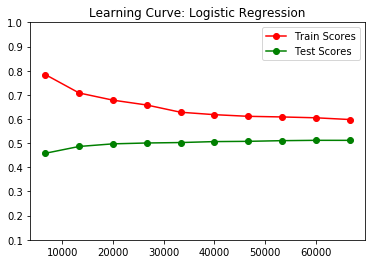

In [297]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'ro-', label="Train Scores")
plt.plot(train_sizes, test_scores.mean(axis=1), 'go-', label="Test Scores")
plt.title('Learning Curve: Logistic Regression')
plt.ylim((0.1, 1.0))
plt.legend()
plt.draw()
plt.show()

### চেষ্টা করে দেখি: NLP with deep learning
আমরা Tokenizer ব্যবহার করছি tensorflow.keras থেকে:
১. ভোকাবুলারি তৈরি করা
২. বাক্যকে সংখ্যার সেকোয়েন্স তৈরি
৩. সেকোয়েন্সকে প্যাড দেয়া যাতে সেটা টেন্সরের মতো ব্যবহার করা যায় pad_sequences ফাংশন ব্যবহার করছি tensorflow.keras থেকে

In [320]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [321]:
tokenizer = Tokenizer(num_words=20000)

# docs = df['quote']
tokenizer.fit_on_texts(docs)
sequences = tokenizer.texts_to_sequences(docs)

In [322]:
sequences[:5]

[[107, 562, 1, 3, 3452],
 [281,
  276,
  2,
  939,
  512,
  18541,
  18,
  526,
  228,
  16,
  11,
  1013,
  10252,
  1014,
  14,
  12536,
  23,
  8379,
  162,
  2324,
  228,
  1951,
  200,
  4,
  212,
  539,
  7218],
 [1043, 208, 110, 7, 111],
 [4, 610, 666, 666, 28, 331, 1467, 90, 27, 131, 289, 220],
 [1274, 3229, 6507, 76, 3694, 3, 256, 6508, 1035, 4525, 291, 132]]

In [323]:
max_features = max([max(seq) for seq in sequences if len(seq) > 0]) + 1
max_features

20000

In [324]:
maxlen = max([len(seq) for seq in sequences])
maxlen

115

In [325]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [352]:
maxlen=50

In [353]:
X = pad_sequences(sequences, maxlen=maxlen)

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

### আরেকটা নেটওয়ার্ক: recurrent neural network model
- সেন্টিমেন্টকে ক্লাসিফাই করতে রিকারেন্ট নিউরাল নেটওয়ার্কের ব্যবহার 

In [355]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6])

In [356]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding
from tensorflow.keras.layers import LSTM, GRU

In [357]:
model1 = Sequential()
model1.add(Embedding(input_dim=max_features,
                    output_dim=32,
                    input_length=maxlen))
model1.add(LSTM(64))
model1.add(Dense(7))
model1.add(Activation('softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0913 22:42:56.640506 139675016652544 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f0758530e50>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


In [358]:
h = model1.fit(X_train, y_train, batch_size=64, epochs=4, validation_split=0.1)

Train on 62985 samples, validate on 6999 samples
Epoch 1/4
62985/62985 [==============================] - 13s 204us/sample - loss: 0.9779 - accuracy: 0.6240 - val_loss: 0.8152 - val_accuracy: 0.6961
Epoch 2/4
62985/62985 [==============================] - 12s 198us/sample - loss: 0.6876 - accuracy: 0.7444 - val_loss: 0.7712 - val_accuracy: 0.7007
Epoch 3/4
62985/62985 [==============================] - 13s 200us/sample - loss: 0.5782 - accuracy: 0.7907 - val_loss: 0.8043 - val_accuracy: 0.6922
Epoch 4/4
62985/62985 [==============================] - 13s 200us/sample - loss: 0.5088 - accuracy: 0.8189 - val_loss: 0.8484 - val_accuracy: 0.6901


In [359]:
model1.evaluate(X_train, y_train, batch_size=32)

69984/69984 [==============================] - 10s 140us/sample - loss: 0.4572 - accuracy: 0.8457


[0.4571943279265485, 0.845679]

In [360]:
loss, acc = model1.evaluate(X_test, y_test, batch_size=32)
acc

29994/29994 [==============================] - 4s 140us/sample - loss: 0.8291 - accuracy: 0.7025


0.7024738

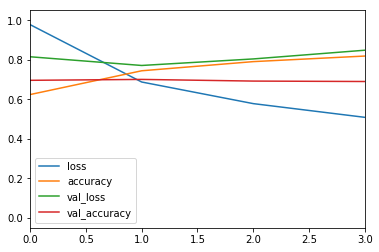

In [361]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

In [362]:
y_pred = model1.predict_classes(X_test)

In [363]:
confusion_matrix(y_test, y_pred)

array([[    0,     0,     1,     0,     0,     0,     0],
       [    0,   185,   171,     5,     1,    22,     0],
       [    0,    80, 11492,   992,   458,   772,     1],
       [    0,     2,  2101,  2595,   782,   243,     0],
       [    0,     0,   811,   554,  2189,   108,     2],
       [    0,    15,  1205,   283,   114,  4609,     0],
       [    0,     2,   148,     2,    15,    34,     0]])

In [343]:
y_pred_all = model1.predict_classes(X)

In [344]:
confusion_matrix(y, y_pred_all)

array([[    0,     0,     1,     0,     0,     1,     0],
       [    0,   807,   318,    13,    11,    65,     0],
       [    0,   184, 41195,  1756,   958,  1738,     2],
       [    0,     6,  4523, 12055,  1640,   726,     0],
       [    0,     4,  1522,  1276,  9670,   270,     1],
       [    0,    47,  2757,   502,   240, 16987,     2],
       [    0,    10,   460,     9,    98,   115,     9]])

In [350]:
# positive (4) labeled as negative (2)
pos_neg_errors_idx = (y == 4) & (y_pred_all == 4)

In [351]:
docs[pos_neg_errors_idx]

array([' হে মহান ফুটবলারবৃন্দ তোমাদের স্মরণ গাঁথা কাব্য চিরদিন মনে থাকবে।তোমরা শান্তিতে থেকো। ',
       ' নিহত সবার পরিবারে প্রতি রইল অন্তরের অন্তস্থল থেকে গভীর সমবেদনা। ',
       ' নিহত সবার পরিবারে প্রতি রইল অন্তরের অন্তস্থল থেকে গভীর সমবেদনা জানাই শোকাহত। ',
       ...,
       ' ঘুরে আসুন এই পেজ বাল লাগবে কাল্পনিক রাজ্য কাল্পনিক রাজ্য কাল্পনিক রাজ্য কাল্পনিক রাজ্য ',
       ' অস্থির একটা ফানি পেজ বাটপার বাটপার বাটপার বাটপার মজা নিতে লাইক দিন বাটপার বাটপার বাটপার বাটপার বাটপার বাটপার বাটপার ',
       ' জা করার তারাতারি করেন ৷ '], dtype=object)

In [337]:
test_sent

' ভালবাসার গল্প পড়তে এই পেইজে লাইক দেন বন্ধুত্ব '

In [338]:
test_sent_numbers = tokenizer.texts_to_sequences([test_sent])

In [339]:
test_sent_X = pad_sequences(test_sent_numbers, maxlen=maxlen)

In [340]:
test_sent_X

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 2184,  780, 1426,
           5,  924,  218,  295, 5132]], dtype=int32)

In [341]:
model1.predict(test_sent_X)

array([[3.2493996e-04, 1.3393437e-04, 1.4631876e-02, 9.5704895e-01,
        2.3777947e-02, 3.7020321e-03, 3.8020010e-04]], dtype=float32)

### অন্য কিছু দেখি 

In [130]:
from tensorflow.keras import regularizers

model2 = Sequential()
model2.add(Embedding(input_dim=max_features,
                    output_dim=32,
                    input_length=maxlen))
model2.add(LSTM(16, return_sequences=True, dropout=0.1))
model2.add(LSTM(8, activity_regularizer=regularizers.l2(0.01), kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

W0912 23:33:49.180243 140230039140096 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f888f68f490>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0912 23:33:49.333416 140230039140096 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f8880bf44d0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 99, 32)            487424    
_________________________________________________________________
unified_lstm_7 (UnifiedLSTM) (None, 99, 16)            3136      
_________________________________________________________________
unified_lstm_8 (UnifiedLSTM) (None, 8)                 800       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 491,369
Trainable params: 491,369
Non-trainable params: 0
_________________________________________________________________


In [92]:
from tensorflow.keras import callbacks
h = model.fit(X_train, y_train, batch_size=64, epochs=4, validation_split=0.1, callbacks=[callbacks.EarlyStopping()])

Train on 2520 samples, validate on 280 samples
Epoch 1/4
2520/2520 [==============================] - 2s 838us/sample - loss: 0.8705 - accuracy: 0.5563 - val_loss: 0.8297 - val_accuracy: 0.6107
Epoch 2/4
2520/2520 [==============================] - 1s 540us/sample - loss: 0.7672 - accuracy: 0.6817 - val_loss: 0.7170 - val_accuracy: 0.6714
Epoch 3/4
2520/2520 [==============================] - 1s 535us/sample - loss: 0.5342 - accuracy: 0.8544 - val_loss: 0.5666 - val_accuracy: 0.8036
Epoch 4/4
2520/2520 [==============================] - 1s 536us/sample - loss: 0.3160 - accuracy: 0.9552 - val_loss: 0.5511 - val_accuracy: 0.8000


In [93]:
model.evaluate(X_train, y_train, batch_size=64)

2800/2800 [==============================] - 1s 192us/sample - loss: 0.2718 - accuracy: 0.9650


[0.2718334950719561, 0.965]

In [94]:
loss, acc = model.evaluate(X_test, y_test, batch_size=64)
acc

1200/1200 [==============================] - 0s 194us/sample - loss: 0.5122 - accuracy: 0.8092


0.80916667

## ফাস্টটেক্সট ব্যবহার

ফাস্টটেক্সট এমবেডিং ব্যবহার করি 